# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.
1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from parso.python.tokenize import group
from scipy.stats import ttest_ind, mannwhitneyu
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

importando o dataframe

In [189]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


imprimindo as colunas

In [190]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [193]:
df_filtrado = df[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']]
df_filtrado

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa


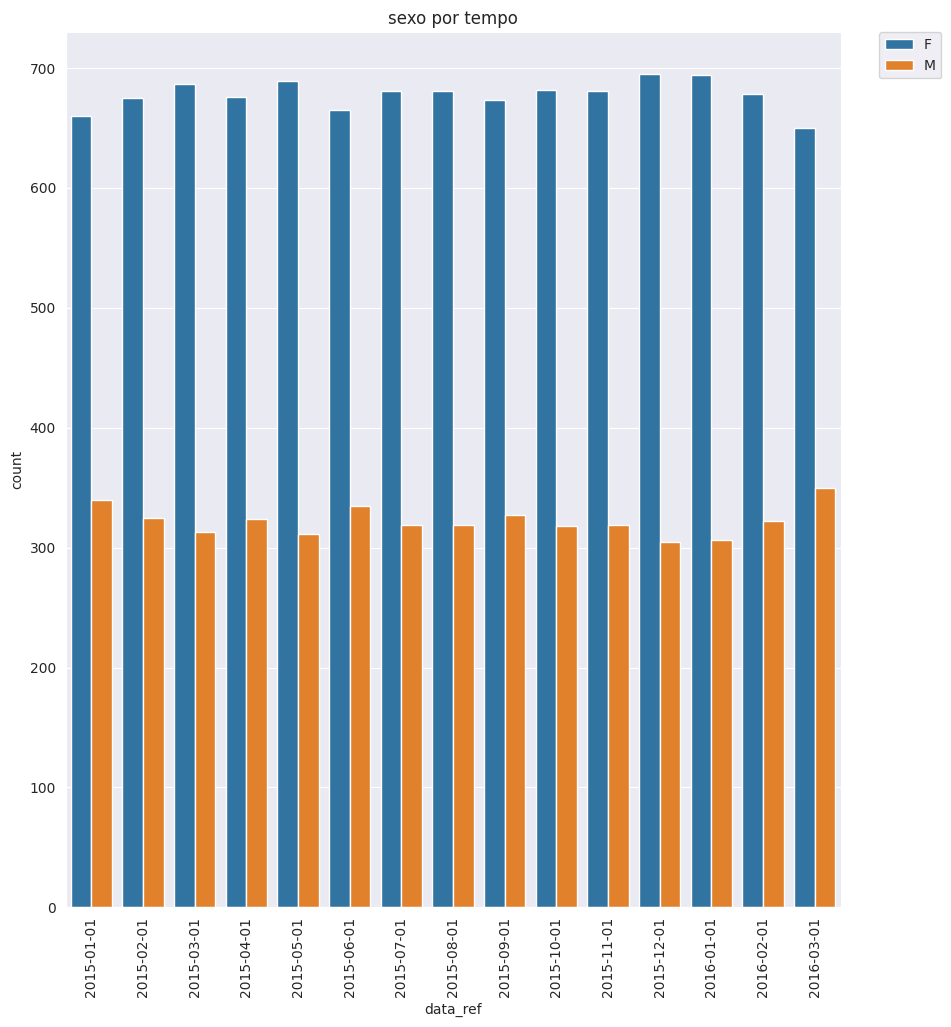

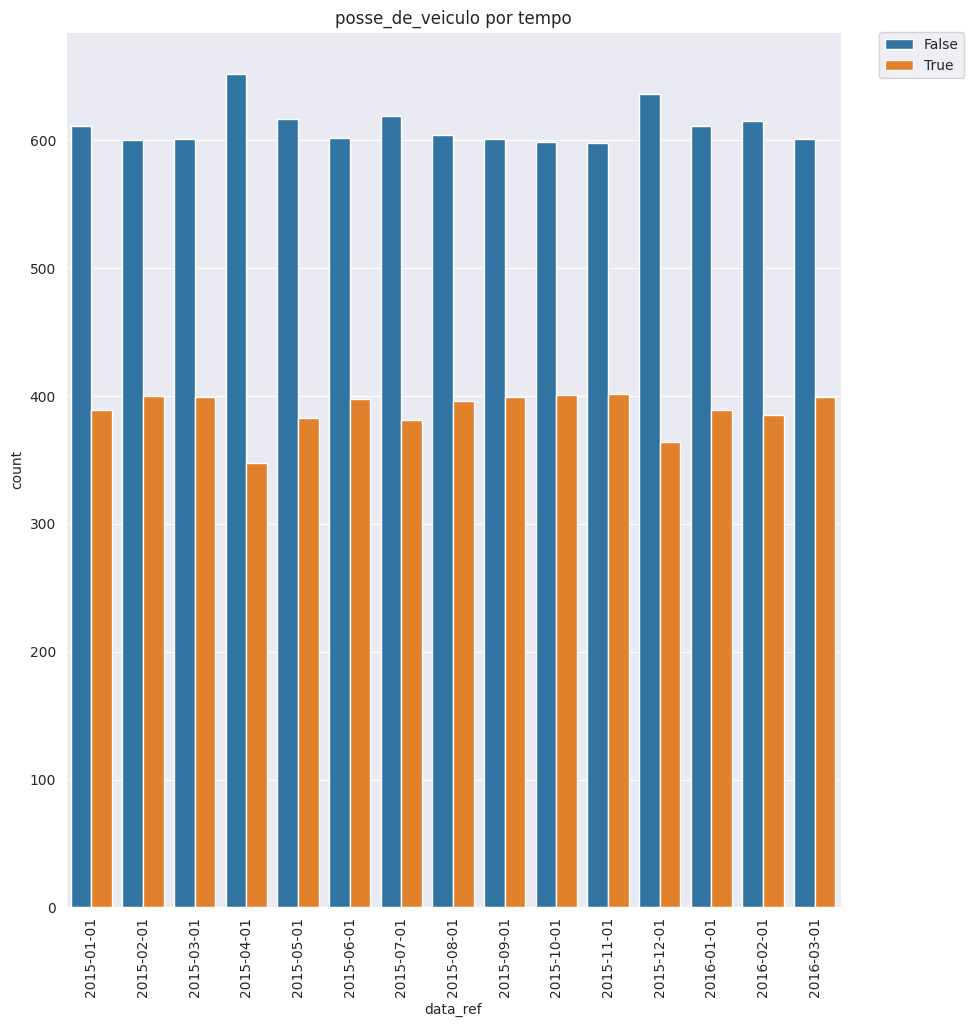

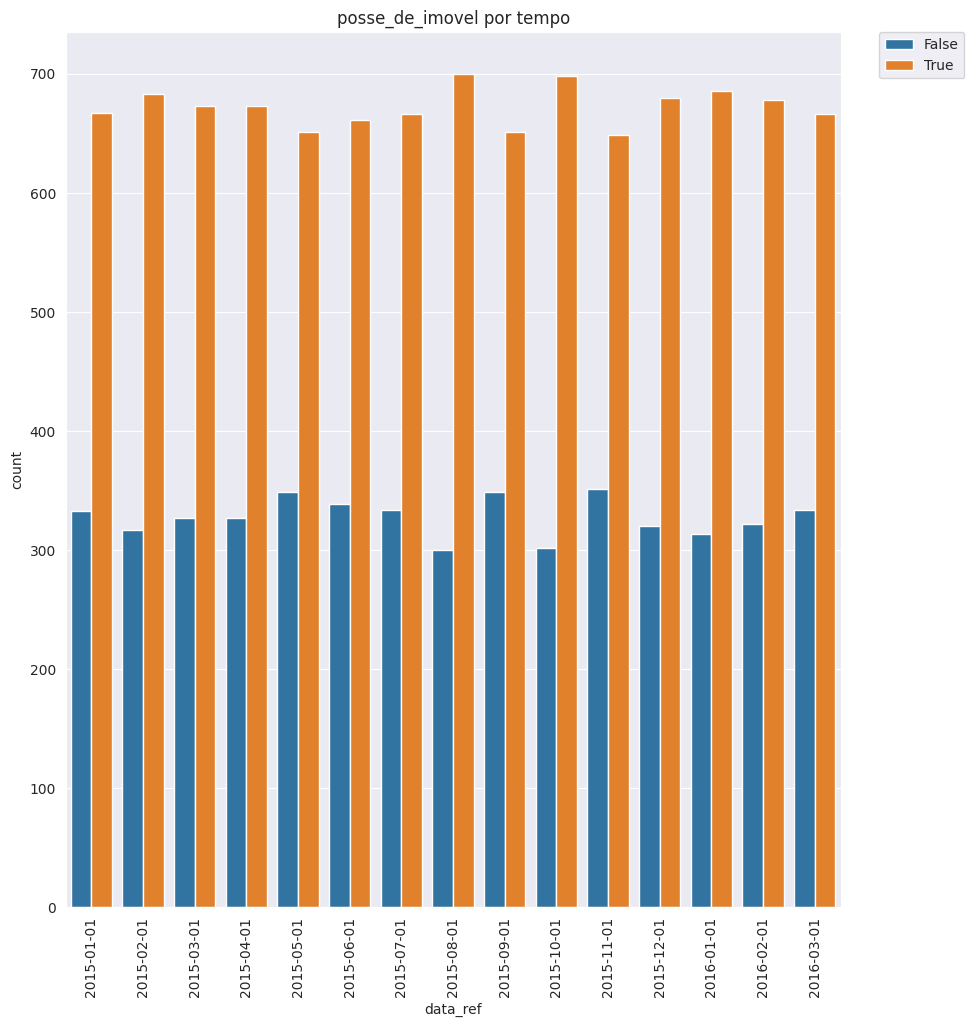

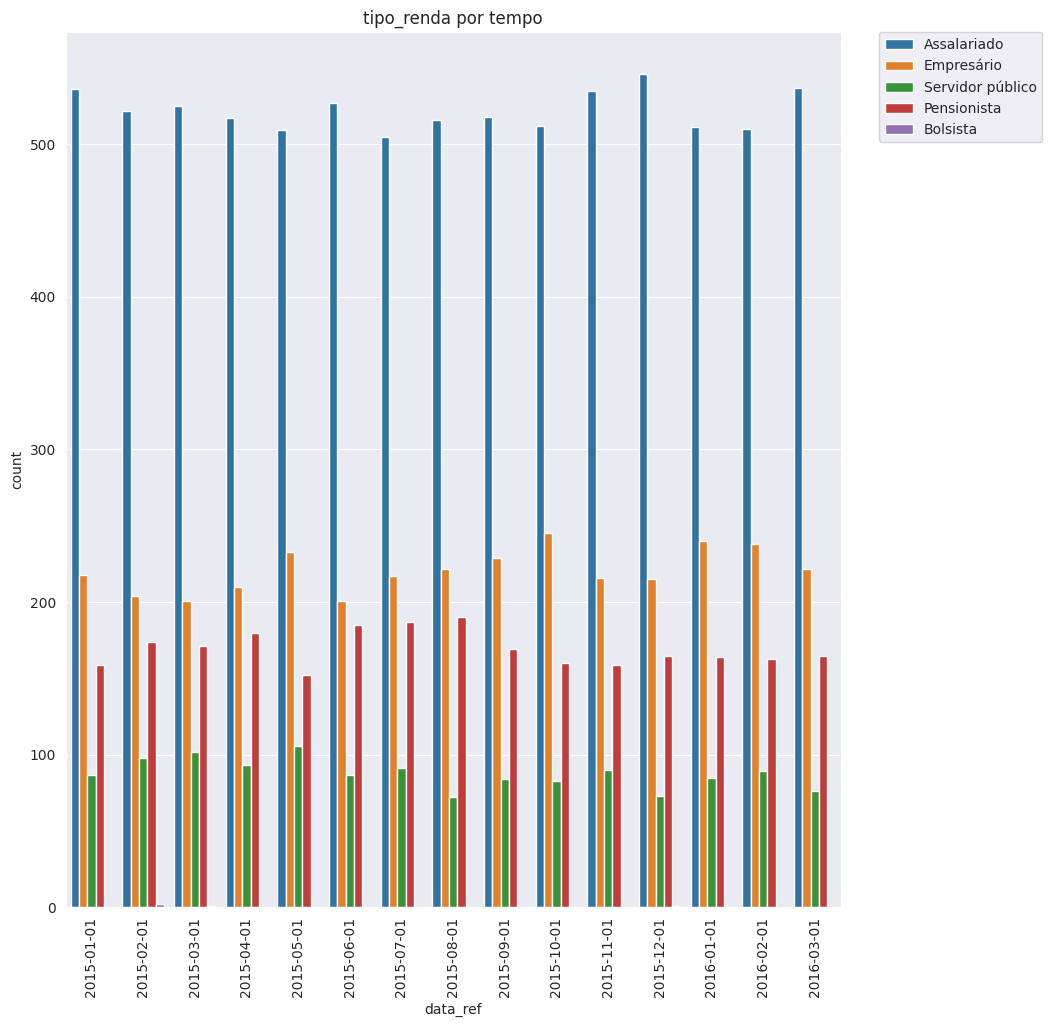

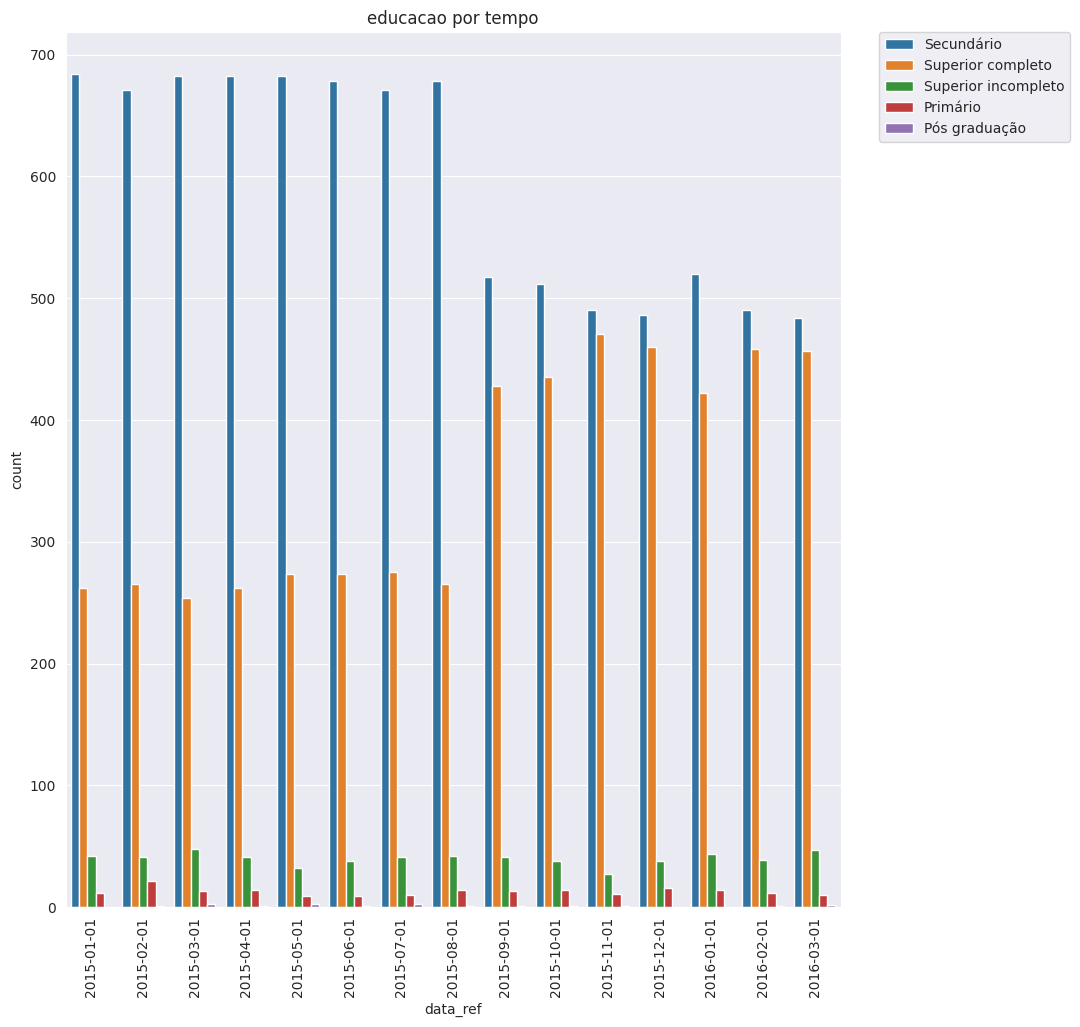

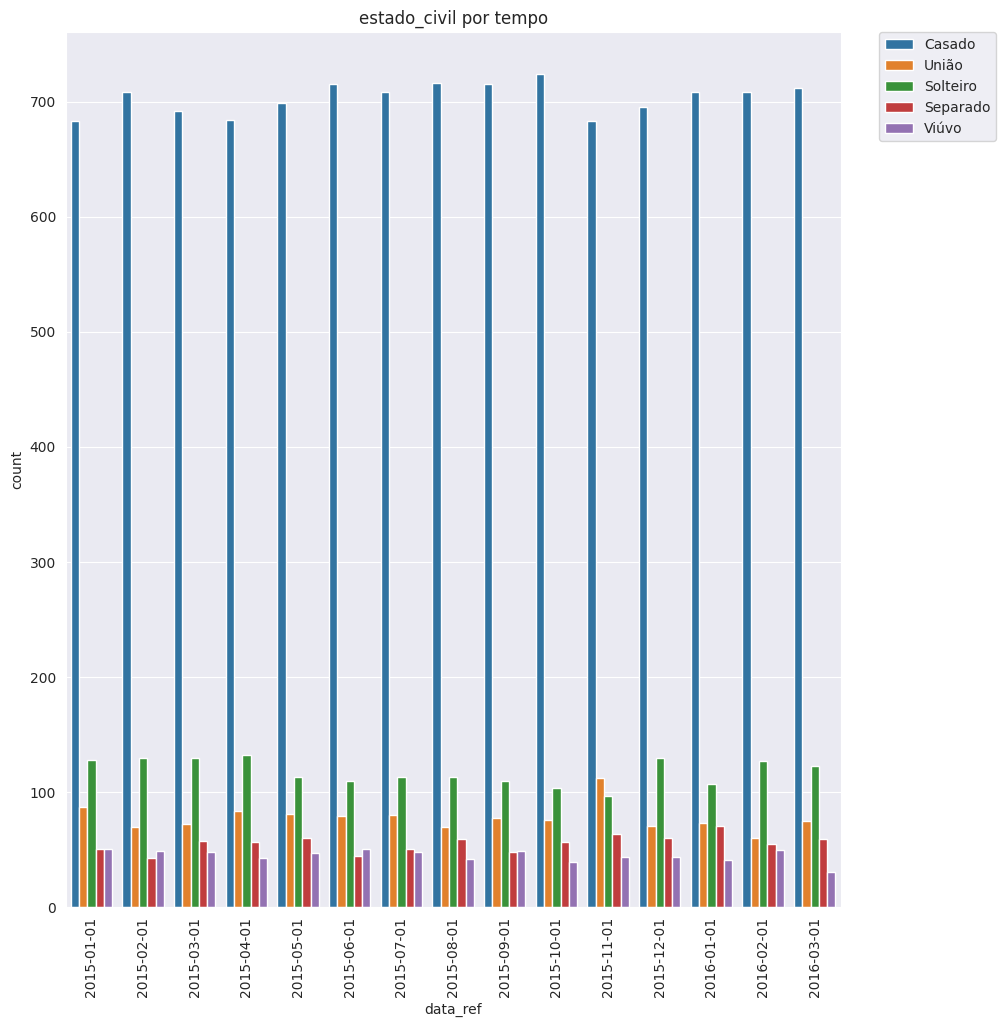

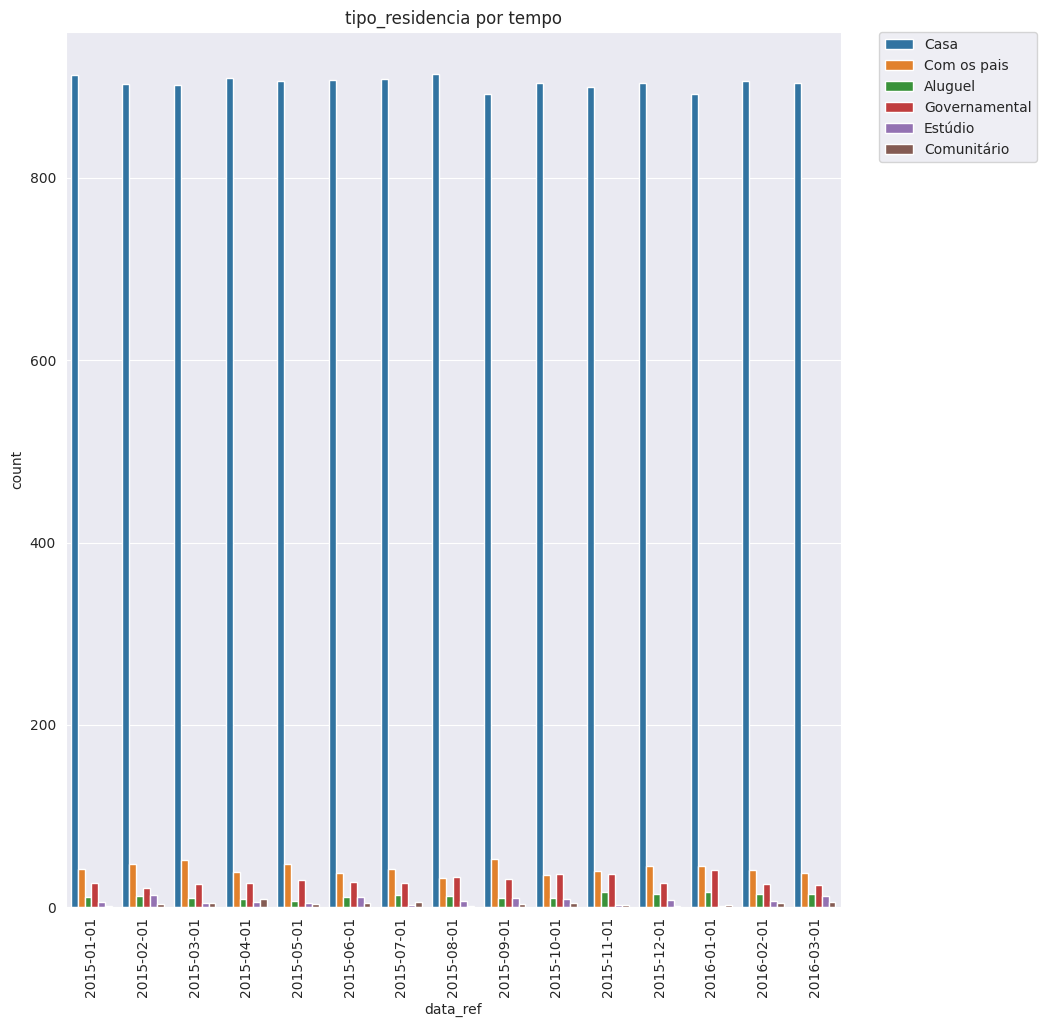

In [201]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas
cont=1
for var in df_filtrado.columns[1:]:
    plt.subplot(2,1,cont)
    cont =+ 1
    sns.countplot(df, x='data_ref', hue=var)
    plt.title(f'{var} por tempo')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


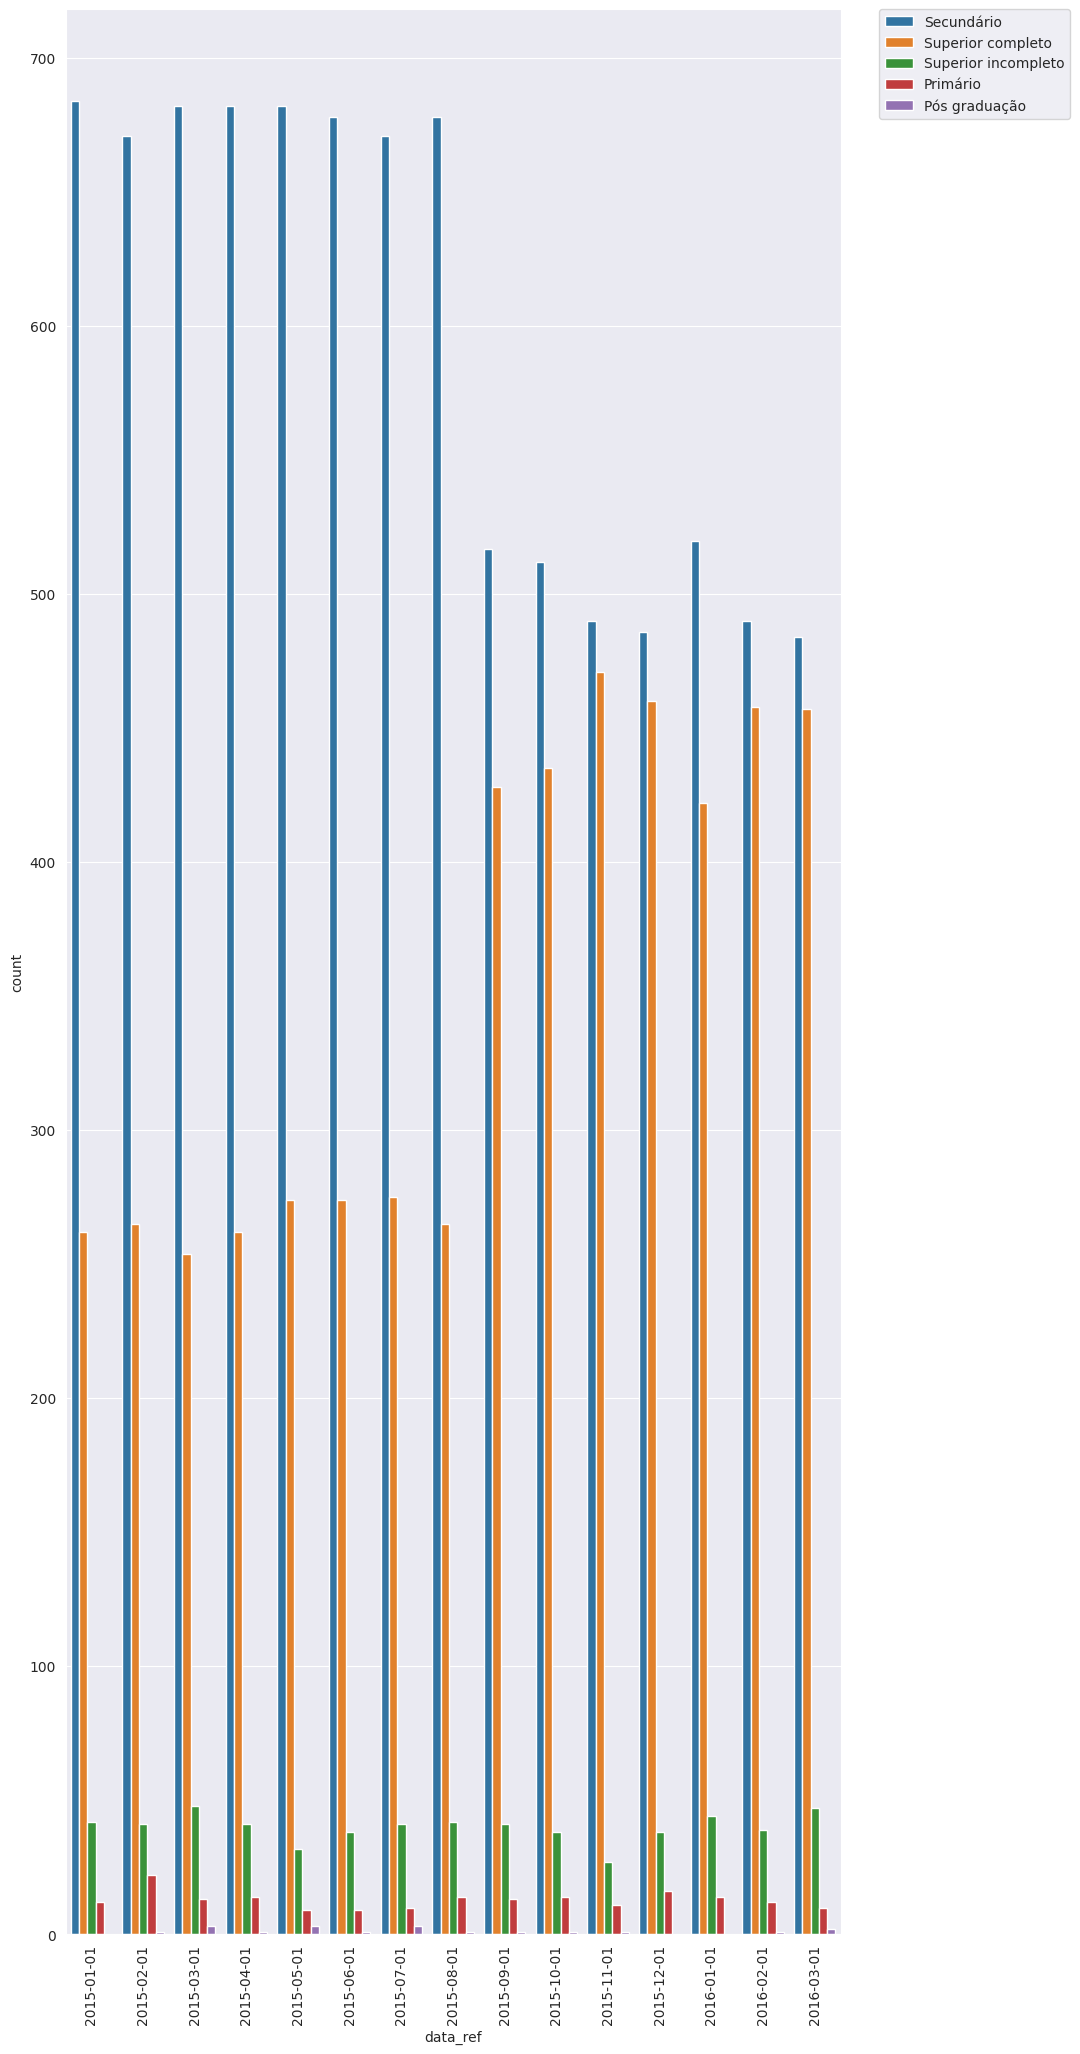

In [202]:
# Analisando o gráfico de escolaridade mais de perto
ax = sns.countplot(x='data_ref', hue='educacao', data= df_filtrado)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

.02) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [203]:
# criando um novo dataframe apenas com variáveis qualitativas
df_qualitativa = df.select_dtypes(include='object')


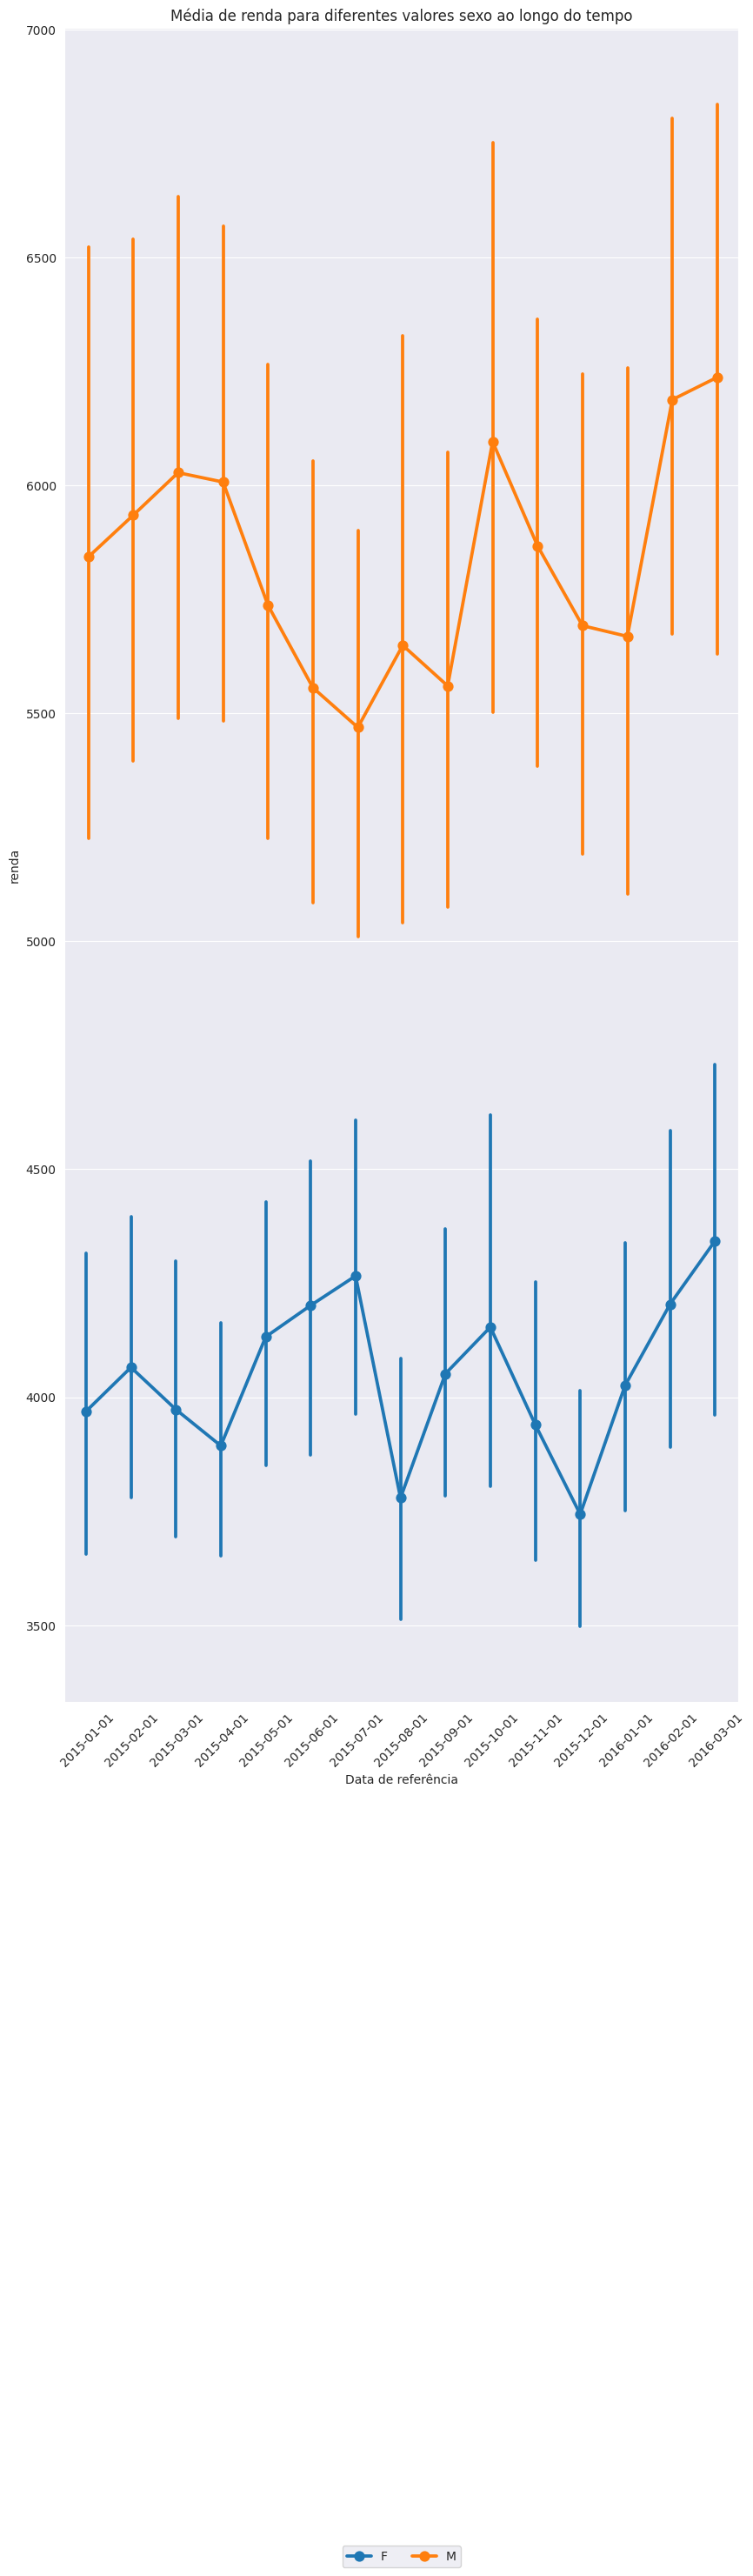

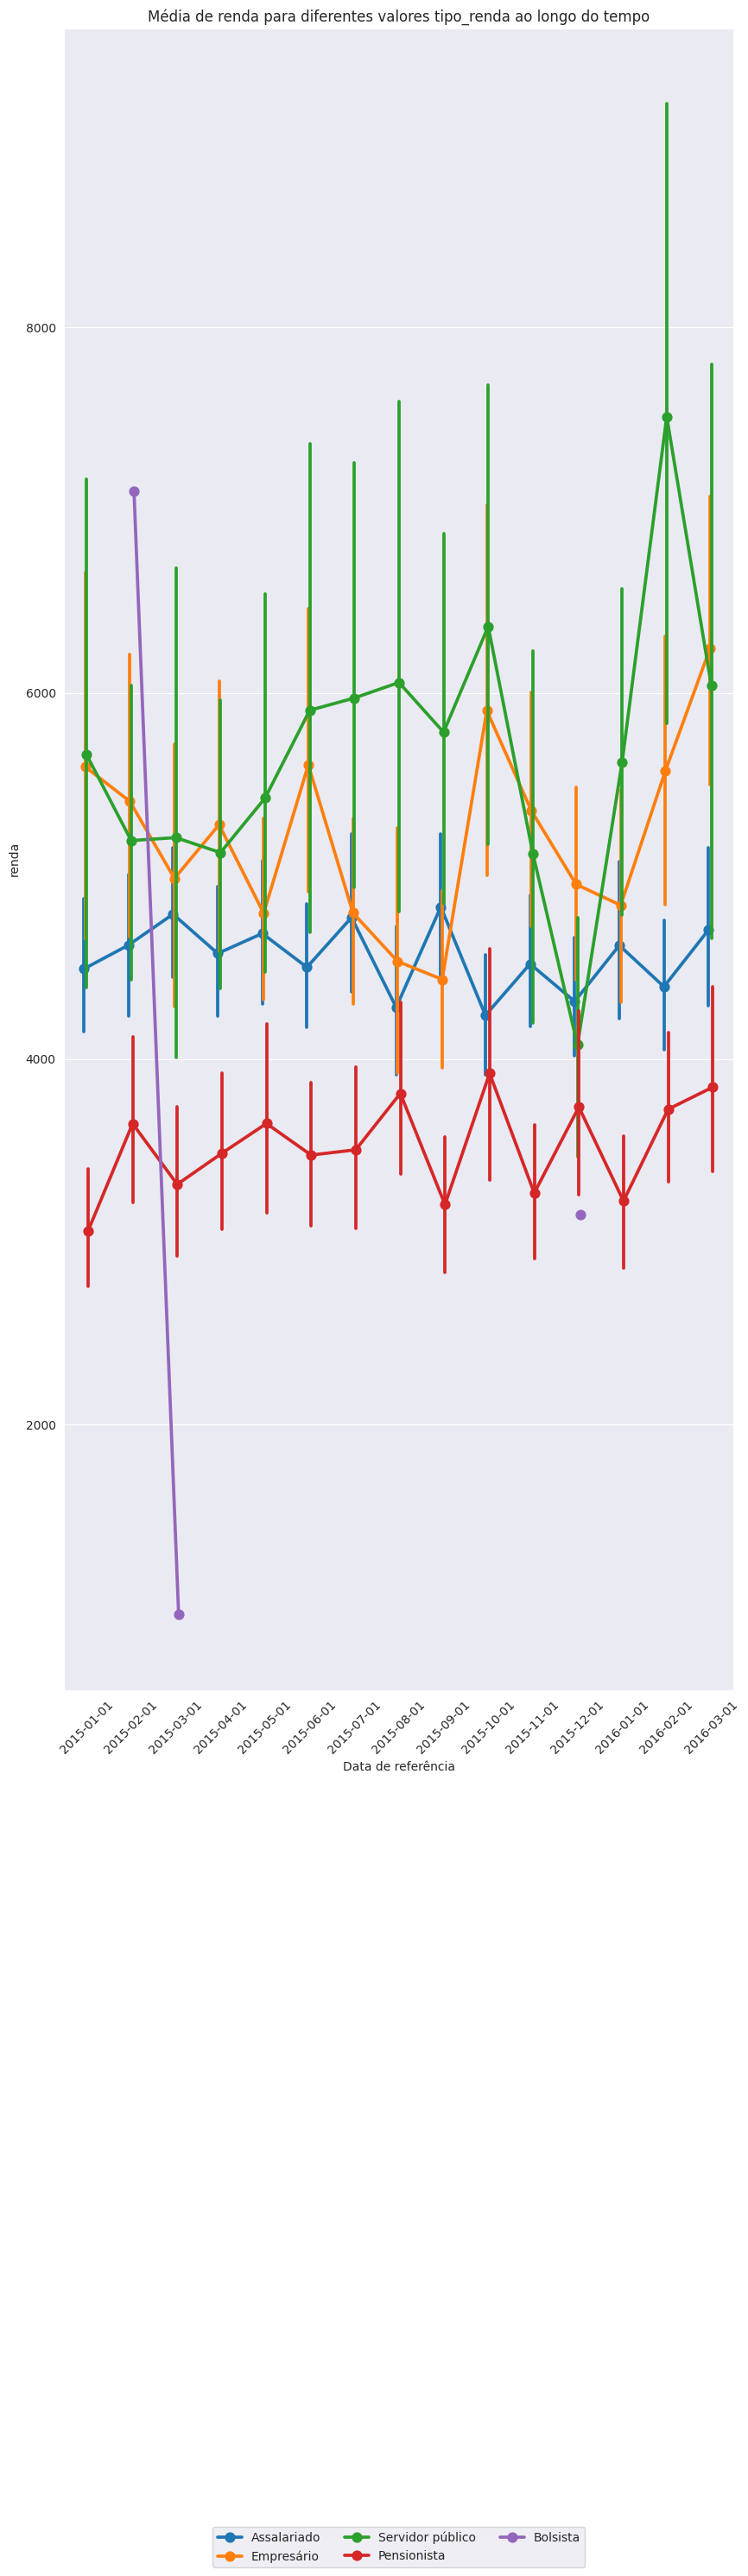

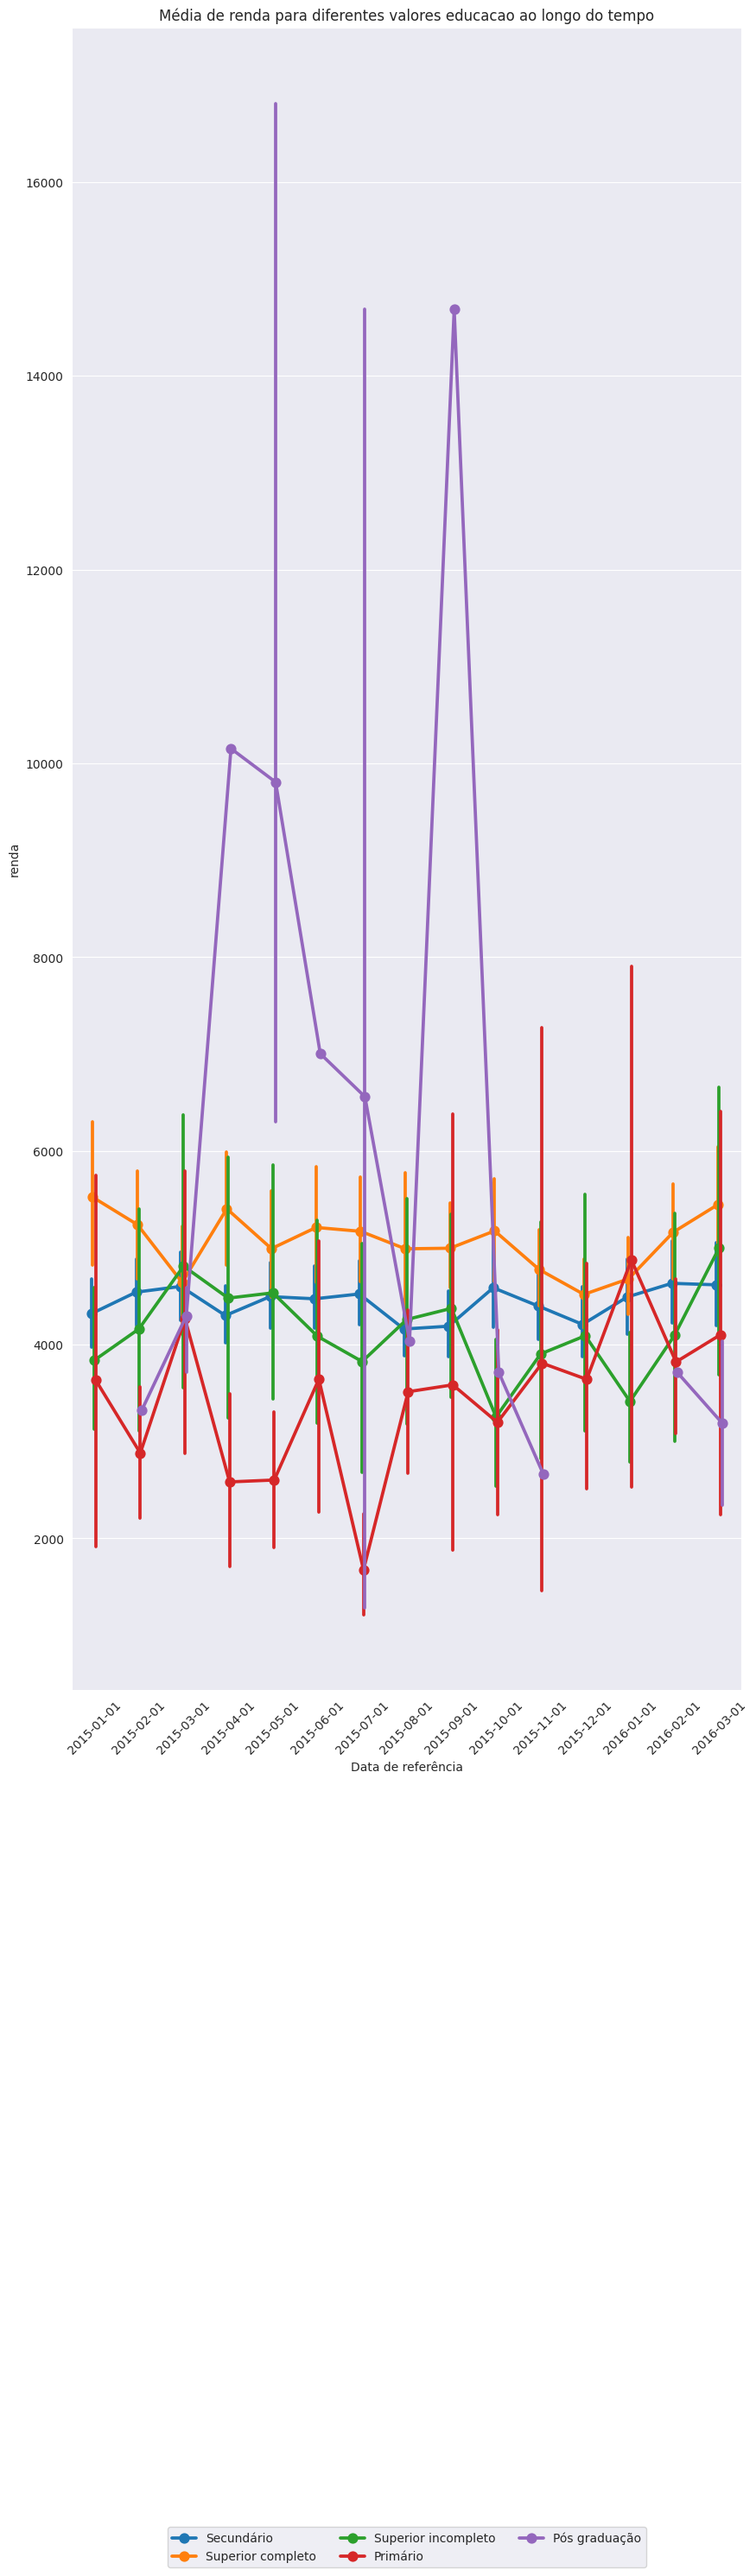

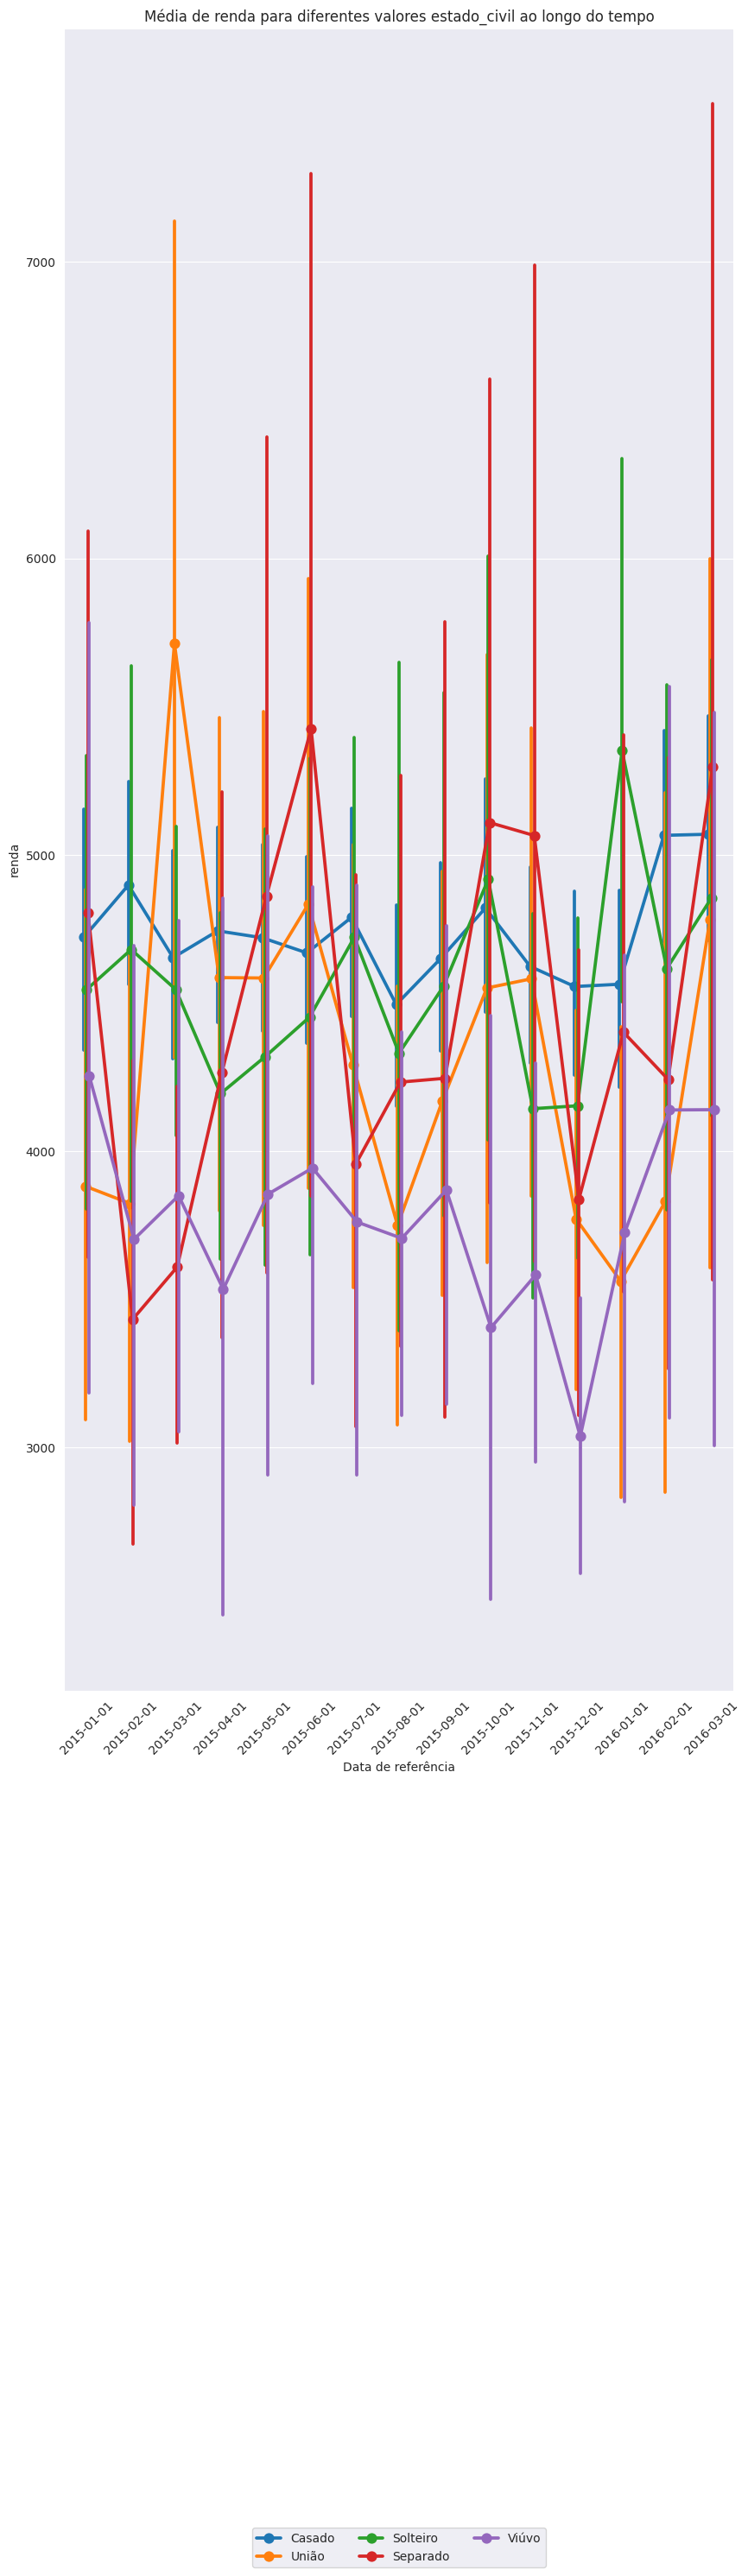

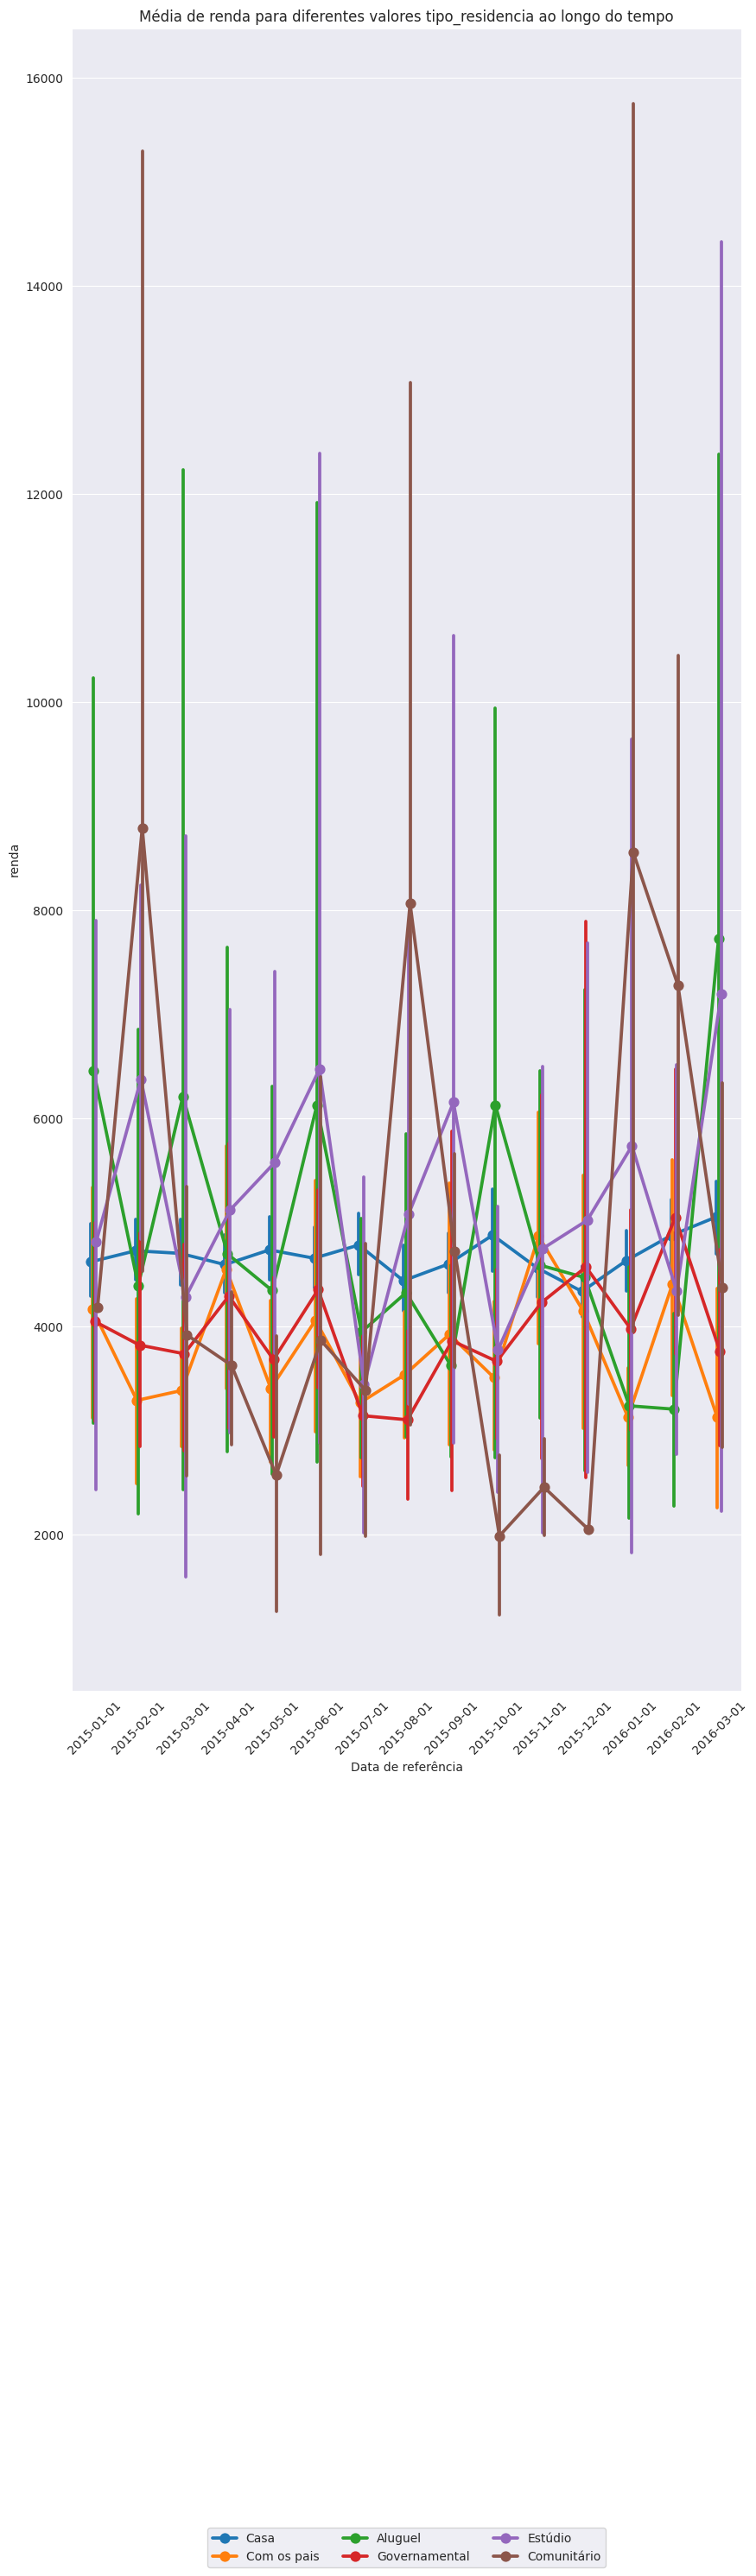

In [204]:
# Plotando os gráficos de contagem para todas as variáveis qualitativas
cont = 1
for col in df_qualitativa.columns[1:]:
    plt.subplot(1,1,cont)
    cont=+ 1
    sns.pointplot(x="data_ref", y="renda", hue = col,
                  data=df, dodge=True, errorbar=('ci', 95))
    plt.title(f'Média de renda para diferentes valores {col} ao longo do tempo')
    plt.xticks(rotation=45)
    plt.xlabel('Data de referência')
    plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -.50),ncol = 3)
    plt.show()
